In [40]:
# imports
import numpy as np

# Question 1: Implementation of Easy21

Below I create an environment implementing the game.
- reset(): generates the start state
- _draw_card() -> card: returns a card represented as a dictionary with "value" and "colour" keys
- step(action): -> (state, reward, terminated): takes an action (either "stick" or "hit") and returns a new state, a rewards (either -1, 0, or +1), and a Boolean denoting whether the terminal state has been reached


In [41]:
class Environment():
    def __init__(self):
        self.state = {
            "dealer_showing" : np.random.choice(np.arange(1, 11)),
            "player_sum": np.random.choice(np.arange(1, 11))
        }
        
    def reset(self):
        self.state = {
            "dealer_showing" : np.random.choice(np.arange(1, 11)),
            "player_sum": np.random.choice(np.arange(1, 11))
        }

        return self.state.copy()
        
    
    def _draw_card(self):
        value = np.random.choice(np.arange(1, 11))
        colour = np.random.choice(["red", "black"], p=[1/3, 2/3])
        card = {
            "value": value,
            "colour": colour,
        }
        return card
    
    
    def step(self, action):
        if action == "hit":
            card = self._draw_card()
            # Update the state based on the drawn card
            if card["colour"] == "black":
                self.state["player_sum"] = self.state["player_sum"] + card["value"]
            else:
                self.state["player_sum"] = self.state["player_sum"] - card["value"]

            # Terminate and return -1 if player went bust
            if self.state["player_sum"] > 21 or self.state["player_sum"] < 1:
                reward = -1
                terminated = True
            # Otherwise return a reward of 0
            else:
                terminated = False
                reward = 0
        
        if action == "stick":
            # We can already terminate as the dealer will keep drawing until a conclusion is reached
            terminated = True
            dealer_sum = self.state["dealer_showing"]
    
            while dealer_sum < 17:
                dealer_card = self._draw_card()
                if dealer_card["colour"] == "black":
                    dealer_sum = dealer_sum + dealer_card["value"]
                else:
                    dealer_sum = dealer_sum - dealer_card["value"]

            # Player wins either by dealer going bust or by having a greater sum
            if (dealer_sum > 21 or dealer_sum < 1) or self.state["player_sum"] > dealer_sum:
                reward = 1
            # Player draws
            elif dealer_sum == self.state["player_sum"]:
                reward = 0
            # Player loses
            else:
                reward = -1
    
        return self.state.copy(), reward, terminated

# Question 2: Monte-Carlo Control

In [95]:
def uniform_random_policy():
    return "hit" if np.random.uniform() > 0.5 else "stick"

values = np.zeros((21, 10))
counts = np.zeros_like(values)

env = Environment()

In [98]:
for _ in range(1000):
    episode = {
        "states":[env.reset()],
        "rewards":[0],
        "actions":[],
    }
    
    terminated = False
    
    while not terminated:
        action = uniform_random_policy()
        state, reward, terminated = env.step(action)
        if not terminated:
            episode["states"].append(state.copy())
        episode["rewards"].append(reward)
        episode["actions"].append(action)

    for t, s in enumerate(episode["states"]):
        counts[s["player_sum"]-1, s["dealer_showing"]-1] += 1
        g = sum(episode["rewards"][t:])
        values[s["player_sum"]-1, s["dealer_showing"]-1] = values[s["player_sum"]-1, s["dealer_showing"]-1] + (1/counts[s["player_sum"]-1, s["dealer_showing"]-1])*(g-values[s["player_sum"]-1, s["dealer_showing"]-1])

In [99]:
counts

array([[12., 10., 11., 12., 13., 10., 17.,  9., 12.,  8.],
       [15., 13., 11., 17., 12., 12., 17., 10., 17., 11.],
       [16., 12., 14., 20., 14., 13., 10., 13., 11., 10.],
       [15., 12., 12., 16., 11., 16., 13., 10., 10., 16.],
       [ 9., 13., 17., 14.,  8., 13.,  8.,  9., 14., 16.],
       [ 8., 15., 17., 14., 11.,  8., 16., 10., 13., 15.],
       [ 9., 12., 19., 13., 13., 14., 15., 23., 15., 15.],
       [16., 25., 19.,  8., 11., 14., 25.,  9., 21.,  9.],
       [ 8., 15., 13., 12., 18., 20., 13., 12., 13., 17.],
       [11., 24., 12., 18., 17., 22., 15., 14., 11., 17.],
       [ 4.,  7.,  5.,  3.,  7.,  1.,  5.,  4.,  5.,  7.],
       [ 4.,  5.,  5.,  4.,  6.,  3.,  5.,  2.,  6.,  3.],
       [ 2.,  4.,  4.,  5.,  4.,  6.,  6.,  3.,  4.,  2.],
       [ 3.,  5.,  3.,  2.,  3.,  5.,  6.,  3.,  7.,  6.],
       [ 5.,  3.,  5.,  5.,  4.,  2.,  3.,  3.,  5.,  5.],
       [ 1.,  3.,  3.,  2., 10.,  6.,  6.,  5.,  3.,  2.],
       [ 0.,  5.,  4.,  0.,  2.,  3.,  2.,  1.,  4.,  2.

In [103]:
values.round(1)

array([[-0.8, -0.2, -0.5, -1. , -0.4, -0.4, -0.5, -0.8, -0.7, -0.8],
       [-0.3, -0.8, -0.3, -0.8, -0.3, -0.7, -0.4, -0.8, -0.8, -0.8],
       [-0.4, -0.3, -0.6, -0.6, -0.7, -0.5, -0.2, -0.4, -0.8, -0.8],
       [-0.6, -0.8, -1. , -0.9, -0.3, -0. , -0.7, -0.2, -0.2, -0.8],
       [-0.6, -0.7, -0.9, -0.7, -0.2, -0.4, -0.2, -0.1, -0.6, -0.4],
       [-1. , -0.5, -0.6, -0.8, -0.6, -0.5, -0.6, -0.4, -0.5, -0.5],
       [-0.7, -0.5, -0.8, -0.5, -0.4, -0.6, -0.5, -0.5, -0.6, -0.7],
       [-0.6, -0.5, -0.5, -0.5, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6],
       [-1. , -0.6,  0.1, -0.5, -0.6, -0.6, -0.1, -0.5, -0.8, -0.8],
       [-0.8, -0.3, -0.5, -0.2, -0.3, -0.7, -0.3, -0.3, -0.3, -0.5],
       [-1. , -0.4, -1. , -0.3, -0.7, -1. , -0.6, -0.5, -0.4, -1. ],
       [ 0.5, -0.2, -1. , -1. , -0.3, -1. , -1. , -1. , -1. , -0.7],
       [-1. ,  0. ,  0. , -0.8, -1. , -1. ,  0. , -0.3,  0. , -1. ],
       [-0.7, -0.6,  0.3, -1. , -1. ,  0.6, -1. ,  1. , -0.3, -0.3],
       [-0.2, -0.3, -0.6, -0.6, -1

In [35]:
import matplotlib.pyplot as plt

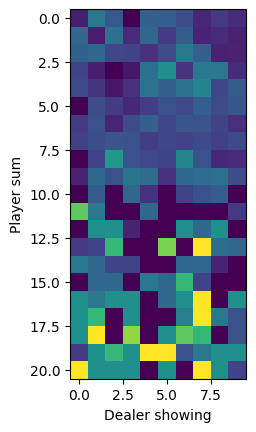

In [104]:
plt.figure(1)
plt.imshow(values)
plt.ylabel("Player sum")
plt.xlabel("Dealer showing")
plt.show()